<a href="https://colab.research.google.com/github/carlosqu/TesisUniandes/blob/master/Notebook_Tesis_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import figure
from matplotlib import *
import sys
from pylab import *
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [31]:
data=pd.read_excel('/content/drive/My Drive/tesis/Universidad de los andes/Luis Francisco Ortiz Santamaria - Balance Demanda/Datos/EIA/Importaciones Refinerias/DF_2000.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
DATE                        233 non-null datetime64[ns]
AVG_API                     233 non-null float64
AVG_AZUFRE                  233 non-null float64
PERCENT_UTILIZACION_PADD    233 non-null float64
CAPACIDAD                   233 non-null int64
API_PROMEDIO_PADD           233 non-null float64
KBD_MONTH                   233 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 12.8 KB


In [32]:
data['Date_Time'] = pd.to_datetime(data.DATE , format = '%m/%d/%Y')
data.index = data.Date_Time
data = data.drop(['Date_Time'], axis=1)
data = data.drop(['DATE'], axis=1)
data.head()

,AVG_API,AVG_AZUFRE,PERCENT_UTILIZACION_PADD,CAPACIDAD,API_PROMEDIO_PADD,KBD_MONTH
Date_Time,,,,,,
2000-01-31,19.541818,2.868312,86.5,7553,31.08,1322.741935
2000-02-29,19.345584,2.833247,87.9,7546,31.42,1519.413793
2000-03-31,19.841379,2.866092,91.5,7548,31.23,1448.129032
2000-04-30,19.304146,2.794390,93.1,7548,31.21,1498.666667
2000-05-31,19.436709,2.890127,94.9,7548,31.65,1446.709677


## **Modelo NN univariado**

In [0]:
uni=data[['KBD_MONTH']]

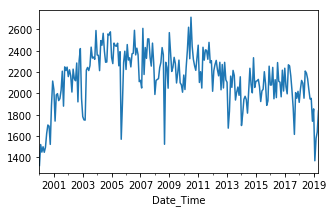

In [34]:
uni = uni.sort_index()
plt.figure(figsize=(5, 3))
uni['KBD_MONTH'].plot()

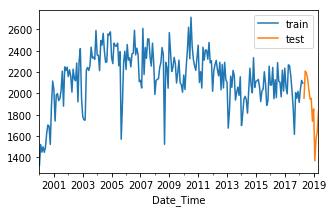

In [35]:
split_date = pd.Timestamp('2018-05-01')
df =  uni['KBD_MONTH']
train = df.loc[:split_date]
test = df.loc[split_date:]
plt.figure(figsize=(5, 3))
ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test']);

In [0]:
scaler = MinMaxScaler(feature_range=(-1, 1))

In [0]:
train=train.values.reshape(-1,1)
train_sc = scaler.fit_transform(train)
test=test.values.reshape(-1,1)
test_sc = scaler.transform(test)

In [0]:
np.random.shuffle(train_sc)

In [0]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [40]:
nn_model = Sequential()
nn_model.add(Dense(100, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1,callbacks=[early_stop] ,shuffle=False)

Epoch 1/100
219/219 [==============================] - 1s 5ms/step - loss: 0.1367
Epoch 2/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1320
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1312
Epoch 4/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1308
Epoch 5/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1306
Epoch 6/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1305
Epoch 7/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1304
Epoch 8/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1304
Epoch 9/100
219/219 [==============================] - 1s 3ms/step - loss: 0.1303
Epoch 10/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1302
Epoch 11/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1302
Epoch 12/100
219/219 [==============================] - 1s 2ms/step - loss: 0.1301
Epoch 13/100


In [41]:
y_pred_test_nn = nn_model.predict(X_test)
y_train_pred_nn = nn_model.predict(X_train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred_nn)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_pred_test_nn)))

The R2 score on the Train set is:	0.002
The R2 score on the Test set is:	-1.014


In [0]:
nn_y_pred_test = nn_model.predict(X_test)

In [43]:
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)

12/12 [==============================] - 0s 21ms/step
NN: 0.256866


In [0]:
test_predict = scaler.inverse_transform(y_pred_test_nn)
test = df.loc[split_date:]
test=test.values.reshape(-1,1)
y_test = test[1:]

In [45]:
print(np.sqrt(mean_squared_error(y_test,y_pred_test_nn)))

1889.7796657053987


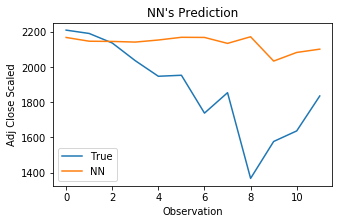

In [46]:
plt.figure(figsize=(5, 3))
plt.plot(y_test, label='True')
plt.plot(test_predict, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

## **Modelo univariado (con look_back)**

In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
split_date = pd.Timestamp('2018-05-01')
dataset =  uni['KBD_MONTH']
train = dataset.loc[:split_date]
test = dataset.loc[split_date:]

In [51]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

ValueError: ignored

In [106]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
model.fit(trainX, trainY, epochs=200, batch_size=2,callbacks=[early_stop], verbose=2)

Epoch 1/200
 - 1s - loss: 6232392.7130
Epoch 2/200
 - 0s - loss: 2844426.0382
Epoch 3/200
 - 0s - loss: 1261241.0639
Epoch 4/200
 - 0s - loss: 355424.5103
Epoch 5/200
 - 0s - loss: 73284.2276
Epoch 6/200
 - 0s - loss: 43486.1471
Epoch 7/200
 - 0s - loss: 42190.1707
Epoch 8/200
 - 0s - loss: 42022.6959
Epoch 9/200
 - 0s - loss: 42026.9681
Epoch 10/200
 - 0s - loss: 42083.3507
Epoch 00010: early stopping


In [107]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 41619.39 MSE (204.01 RMSE)
Test Score: 53189.17 MSE (230.63 RMSE)


In [0]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

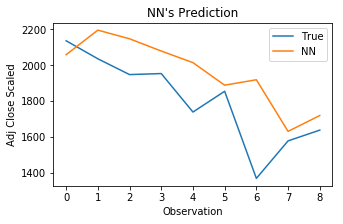

In [109]:
plt.figure(figsize=(5, 3))
plt.plot(testY, label='True')
plt.plot(testPredict, label='NN')
plt.title("NN's Prediction")
plt.xlabel('Observation')
plt.ylabel('Adj Close Scaled')
plt.legend()
plt.show();

## **Modelo NN Multivariado**

In [0]:
from pandas import DataFrame
from pandas import read_csv
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
from numpy import concatenate
from numpy import diff
import numpy
import pandas
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)
# convert series to supervised learning
def series_to_supervised(data, n_in, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [0]:
df = data[['KBD_MONTH','API_PROMEDIO_PADD','PERCENT_UTILIZACION_PADD']]
values = df.values

In [0]:
# normalize features
values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
reframed.drop(reframed.columns[[4,5]], axis=1, inplace=True)
values = reframed.values
values = reframed.values

In [0]:
n_train = -12 # last 12 months to test

train, test = values[0:n_train], values[n_train:]
# split into input (all columns exceptc last one) and outputs (last column)
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

In [0]:
test_X.shape

(12, 3)

In [0]:
# reshape input to be 3D [samples, timesteps, features]; each line turns into an 'sub-array'
# train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
# test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

Train on 220 samples, validate on 12 samples
Epoch 1/70
220/220 [==============================] - 1s 6ms/step - loss: 0.0184 - val_loss: 0.0275
Epoch 2/70
220/220 [==============================] - 1s 3ms/step - loss: 0.0207 - val_loss: 0.0269
Epoch 3/70
220/220 [==============================] - 1s 3ms/step - loss: 0.0199 - val_loss: 0.0256
Epoch 4/70
220/220 [==============================] - 1s 3ms/step - loss: 0.0192 - val_loss: 0.0241
Epoch 5/70
220/220 [==============================] - 1s 3ms/step - loss: 0.0186 - val_loss: 0.0236
Epoch 6/70
220/220 [==============================] - 1s 2ms/step - loss: 0.0183 - val_loss: 0.0224
Epoch 7/70
220/220 [==============================] - 1s 3ms/step - loss: 0.0178 - val_loss: 0.0217
Epoch 8/70
220/220 [==============================] - 1s 3ms/step - loss: 0.0176 - val_loss: 0.0215
Epoch 9/70
220/220 [==============================] - 1s 3ms/step - loss: 0.0173 - val_loss: 0.0212
Epoch 10/70
220/220 [==============================] - 

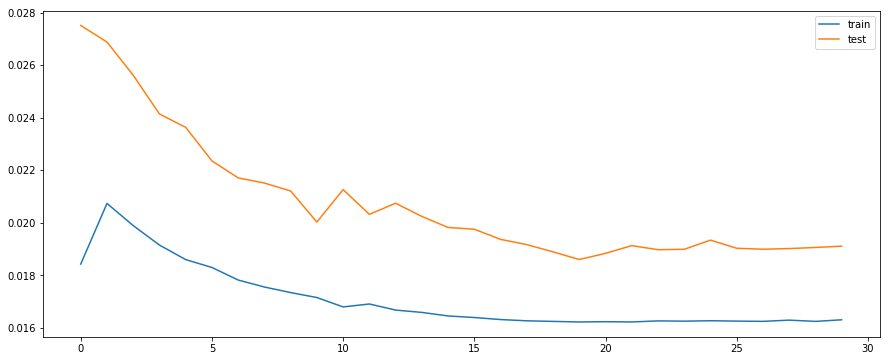

IndexError: ignored

In [26]:
neurons = 200
batch_size = 1
epochs = 70
def create_model():
    model = Sequential()
    model.add(Dense(neurons, input_dim=3, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    #history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_X, test_y), verbose=0, shuffle=False)
    history = model.fit(train_X, train_y, epochs=epochs, batch_size=batch_size, validation_data=(test_X, test_y),
                        callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)
    return model, history
model, history  = create_model()
model.summary()

# plot history

fig = plt.figure(figsize=(15, 6))
pyplot.clf()
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

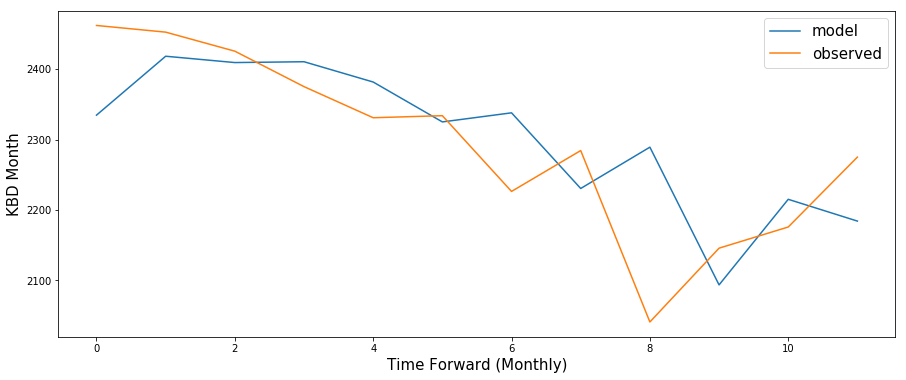

Train Mean Absolute Error:  72.42608641891373
Train Root Mean Square Error:  96.24714785537883
Test Mean Absolute Error:  72.42608641891373
Test Root Mean Squared Error:  96.24714785537883


In [52]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual - observed data
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
fig = plt.figure(figsize=(15, 6))
pyplot.clf()
pyplot.plot(inv_yhat, label="model")
pyplot.plot(inv_y, label="observed")
plt.ylabel('KBD Month', size=15)
plt.xlabel('Time Forward (Monthly)', size=15)
plt.legend(fontsize=15)
24
pyplot.show()
print('Train Mean Absolute Error: ', mean_absolute_error(inv_yhat, inv_y))
print('Train Root Mean Square Error: ', np.sqrt(mean_squared_error(inv_yhat, inv_y)))
print('Test Mean Absolute Error: ', mean_absolute_error(inv_yhat, inv_y))
print('Test Root Mean Squared Error: ', np.sqrt(mean_squared_error(inv_yhat, inv_y)))